## Artificial neurons - a brief glimpse into the early history of machine learning

Warren McCulloch and Walter Pitts in 1943 published the first concept of a simplified brain cell, the so-called McCulloch-Pitts (MCP) neuron, when they were trying to understand how the biological brain works in order to design an Artificial Intelligence.

Biological neurons are interconnected nerve cells in the brain that are involved in the processing and 
transmitting of chemical and electrical signals, which is illustrated in the figure below.

<img src="./imgs/biological_neurons.png">

McCulloch and Pitts simplified the biological neuron to a simple model of an artificial neuron. They described it as a simple logic gate with binary outputs; multiple signals arrive at the dendrites, they are then integrated into the cell body, and, if the accumulated signal exceeds a certain threshold, an output signal is generated that will be passed on by the axon.

The artificial neuron either fires or it doesn't. And, whether it fires depends on the net input exceeding a certain threshold, $θ$ i.e., the output signal can be thought of as a unit step function.

$$ \text{output} = \begin{cases} \text{1 : net input } \geq \theta \\ \text{0 : otherwise} \end{cases} $$

Only a few years later in 1957 Frank Rosenblatt published the first concept of the perceptron learning rule based on the MCP neuron model.

With his perceptron rule, Rosenblatt proposed an algorithm that would automatically *learn the optimal weight coefficients* that would *then be multiplied with the input features* in order to make the decision of whether a neuron fires (transmits a signal) or not.

In the context of supervised learning and classification, such an algorithm could then be used to predict whether a new data point belongs to one class or the other.

### The formal definition of an artificial neuron

Formally we can describe the concept of MCP (MacCulloch-Pitts) neurons in the context of a binary classification task with two classes: 0 and 1.

The weights $w$ are real-valued numbers and $x$ is a vector of the input features:

$$ w = \begin{bmatrix} w_1 \\ w_2 \\ \vdots \\ w_m \end{bmatrix} \quad x = \begin{bmatrix} x_1 \\ x_2 \\ \vdots \\ x_m \end{bmatrix} $$

The output of a neuron is then a function of the net input, $z$, where $z$ is the sum of the weighted inputs:

$$ z = w_1x_1 + \dots + w_mx_m = \sum_{j=1}^{m}w_jx_j = w^Tx $$

Now, if the net input of a particular obsevation, $x^{(i)}$, is greater than a defined threshold, $\theta$, the neuron fires and takes the value 1 otherwise, it takes the value 0 and the decision function is simply:

$$ \sigma(z) = \begin{cases} 1 & \text{if } z \geq \theta \\ 0 & \text{otherwise} \end{cases} $$

**`Note:`** Here the vector of input features, $x$ is a $(n \times 1)$ dimensional matrix which is also called a column vector. In reality there are $m$ number of features for each observation, $i$. If we wrote the feature matrix as a whole for all the observations then it would have been a $(n \times m)$ dimensional matrix where $m$ is the number of features and $n$ in the number of observations. The weight vector $w$ will be a $(m \times p)$ dimensional matrix where $m$ is the number of columns in the feature matrix and $p$ is the number of outputs. The output of the neuron $y$ will be a $(n \times p)$ dimensional matrix. One thing to note is that, for all observations the weight vector $w$ will be the same. The only thing that will change is the input feature vector $x$.

To simplify the code implementation, we rewrite the condition for firing the neuron as, 

$$z - \theta \geq 0$$ 

And we also define a **bias unit,** 

$$b = -\theta$$

So that the net input $z$ becomes:

$$ z = w_1x_1 + \dots + w_mx_m + b = \sum_{j=1}^{m}w_jx_j + b = w^Tx + b $$

And thus the decision function becomes:

$$ \sigma(z) = \begin{cases} 1 & \text{if } z \geq 0 \\ 0 & \text{otherwise} \end{cases} $$

## The perceptron learning rule

Roseblatt's initial perceptron rule is fairly simple and can be summarized by the following steps:

1. Initialize the weights to 0 or small random numbers.

2. For each training sample $x^{(i)}$ perform the following steps:
    - Compute the output value, $\hat{y}$.
    - Update the weights and bias unit.

The weights and bias are updated based on the following rules:

$$ w_j := w_j + \Delta w_j $$
$$ \Delta w_j = \eta (y^{(i)} - \hat{y}^{(i)})x_j^{(i)} $$

$$ b := b + \Delta b $$
$$ \Delta b = \eta (y^{(i)} - \hat{y}^{(i)}) $$

Where, 
- $\eta$ is the learning rate (a constant between 0.0 and 1.0)
- $y^{(i)}$ is the true class label of the $i$ th training sample 
- $\hat{y}^{(i)}$ is the predicted class label of the $i$ th training sample
- $x_j^{(i)}$ is the $j$ th feature value of the $i$ th training sample

To illustrate how beautifully simple the perceptron learning rule is let us think of two separate scenarios.

**Scenario 1:** The perceptron predicts the class label correctly.

1. $y_i = 1$ and $\hat{y}_i = 1$; then $\Delta w_j = \eta (1 - 1) x_j^{(i)} = 0$ and $\Delta b = \eta (1 - 1) = 0$

2. $y_i = 0$ and $\hat{y}_i = 0$; then $\Delta w_j = \eta (0 - 0) x_j^{(i)} = 0$ and $\Delta b = \eta (0 - 0) = 0$

**Scenario 2:** The perceptron predicts the class label incorrectly.

1. $y_i = 1$ and $\hat{y}_i = 0$; then $\Delta w_j = \eta (1 - 0) x_j^{(i)} = \eta x_j^{(i)}$ and $\Delta b = \eta (1 - 0) = \eta$

2. $y_i = 0$ and $\hat{y}_i = 1$; then $\Delta w_j = \eta (0 - 1) x_j^{(i)} = -\eta x_j^{(i)}$ and $\Delta b = \eta (0 - 1) = -\eta$

So, when the predictions are correct the weights and bias unit remain unchanged. However, when the prediction is incorrect the weights and bias unit are being pushed towards the direction of the positive or negative target class, respectively. 

Also note that the weight update is proportional to the value of the input feature. As a result when the perceptron encounters a sample that is far away from the decision boundary and incorrectly classifies the instance, the updates to the weights are also larger in order to make sure that the perceptron learns from such mistakes and gets it right the next time it encounters such an instance.

**`Note:`** It is important to note that the convergence of the perceptron is only guaranteed if the two classes 
are linearly separable. If the two classes can’t be separated by a linear decision boundary, we can set a maximum number of passes over the training dataset (***epochs***) and/or a threshold for the number of tolerated misclassifications, otherwise the perceptron would never stop updating the weights.

The following diagram nicely summarizes the concept of the perceptron:

<img src="./imgs/perceptron.png">

*The perceptron receives the inputs of an example (x) and combines them with the bias unit (b) and weights (w) to compute the net input. The net input is then passed on to the threshold function, which generates a binary output of 0 or 1 — the predicted class label of the example. During the learning phase, this output is used to calculate the error of the prediction and update the weights and bias unit.*

### An object-oriented perceptron API

**Note:** As a convention, class attributes that are not instantiated in the constructor method, has a trailing underscore (e.g., `self.w_`).

In [83]:
class Perceptron:

    """
    Implementation of the Rosenblatt's Perceptron algorithm (A single layer NN).

    Parameters
    -------------
    eta : float
        Learning rate of the perceptron (between 0.0 and 1.0), default 0.01.
    n_epochs : int
        Number of passes over the training set, default 25.
    random_state : int
        Random seed for reproducable random weight initialization, default 26.

    Attributes
    -------------
    w_ : 1-d array
        Final weights of the model after training is completed.
    b_ : Scalar
        The value of the bias unit after training is completed.
    n_errors_ : List
        Number of misclassifications (weight updates) in each epoch.
    """

    def __init__(self, eta=0.01, n_epochs=25, random_state=26):
        self.eta = eta
        self.n_epochs = n_epochs
        self.random_state = random_state

    def fit(self, X, y):
        """
        Parameters
        ------------
        X : {array-like}
            Feature matrix of shape (n, m) where n is the number of observations
            and m is the number of features.
        y : {array-like}
            Target variable of shape (n, 1).
        """
        n, m = X.shape
        rng = np.random.default_rng(seed=self.random_state)
        self.w_ = rng.normal(loc=0, scale=0.01, size=m)
        self.b_ = np.float32(0.0)

        self.n_errors_ = []

        for _ in range(self.n_epochs):
            epoch_error_count = 0
            for xi, yi in zip(X, y):
                # the predict method is used here to get the value of yi_hat
                # it can also be used for classification of new unseen data points
                delta_b = self.eta * (yi - self.predict(xi))

                # both xi and wi are arrays of shape (1, m)
                # xi * wi represents element-wise multiplication
                delta_w = xi * delta_b

                self.b_ += delta_b
                self.w_ += delta_w

                epoch_error_count += int(delta_b != 0)

            self.n_errors_.append(epoch_error_count)

        return self

    def net_input(self, X):
        """Calculate net input, z = sum(wj.xj) + b"""
        return np.dot(X, self.w_) + self.b_

    def predict(self, X):
        """Predict and return class label from an input array of shape (n, m)"""
        # since fit will be called before the predict method we get away with defining self.w_ and self.b_
        # inside the fit method
        return np.where(self.net_input(X) >= 0.0, 1, 0)

### Training a perceptron model on the Iris dataset

In [69]:
import warnings

warnings.filterwarnings("ignore")

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
# load the iris dataset
iris_df = sns.load_dataset("iris")

In [33]:
# explore the dataset
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [34]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [36]:
iris_df["species"].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

From our initial exploration we can see that there are 50 samples of 3 different Iris flower species in the Iris dataset. Also there are 4 possible features that describe the samples of the Iris flowers.

To test our perceptron implementation, we will restrict our analyses to two feature variables (dimensions). Although the perceptron rule is not restricted to two dimensions, considering only two features, *"sepal_length"* and *"petal_length"*, will allow us to visualize the decision regions of the trained model in a scatterplot for learning purposes.

We will also use samples only from the two flower classes *"Setosa"* and *"Versicolor"* since the perceptron algorithm is a binary classifier. Although the perceptron algorithm can be extended to multi-class classification we will stick to the binary classification for simplicity.

In [59]:
# extract samples for which species == "setosa" | "versicolor"
iris_df_perceptron = iris_df.query("species != 'virginica'")

In [61]:
# encode "setosa" as 0 and "versicolor" as 1 and then we assign it to target variable
y = np.where(iris_df_perceptron["species"] == "setosa", 0, 1)

In [99]:
# extract the features (petal_length and sepal_length) as a numpy array of shape (100, 2)
X = iris_df_perceptron[["sepal_length", "petal_length"]].values

Before we train the perceptron let's first visualize the data in a 2D scatter plot.

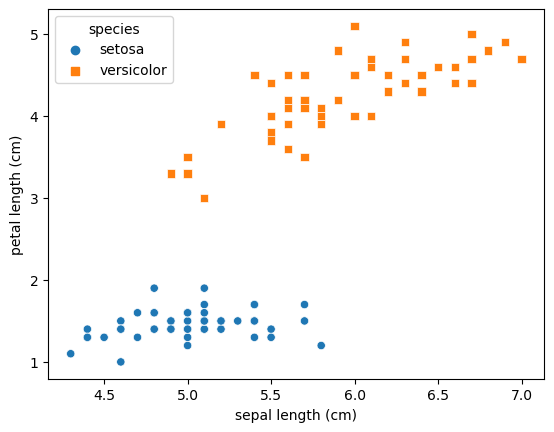

In [100]:
ax = sns.scatterplot(x="sepal_length", y="petal_length", hue="species", style="species", markers=["o", "s"], data=iris_df_perceptron)
ax.set(xlabel="sepal length (cm)", ylabel="petal length (cm)")
plt.show()

The figure shows the distribution of flower examples in the Iris dataset along the two feature axes: petal length and sepal length (measured in centimeters). In this two-dimensional feature subspace, we can see that a linear decision boundary should be sufficient to separate setosa from versicolor flowers. Thus, a linear classifier such as the perceptron should be able to classify the flowers in this dataset perfectly (since all the data is used for training and prediction will be done on the training set).

Now let's train the perceptron algorithm on the Iris data subset that we just extracted. Furthermore, we will plot the misclassification error for each epoch to check whether the algorithm converged and found a decision boundary that separates the two Iris flower classes.

In [101]:
# instantiate the model and train the model on the iris data subset for 10 epochs with a learning rate of 0.1
ppn = Perceptron(eta=0.1, n_epochs=10)
ppn.fit(X, y)

In [102]:
# final model weights and bias unit
print(f"final model weights: {ppn.w_}")
print(f"bias unit value: {ppn.b_}")

final model weights: [-0.34925064  0.88981205]
bias unit value: -0.2


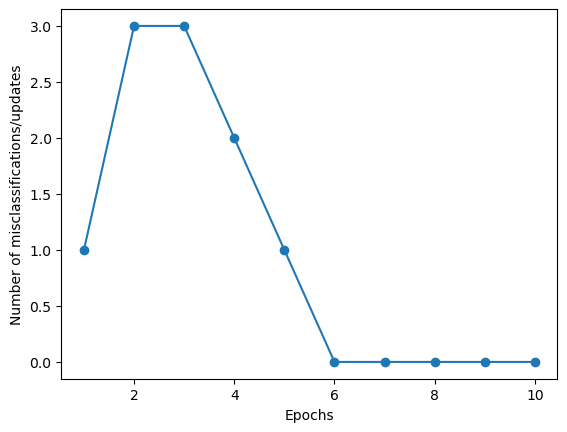

In [103]:
# plot number of misclassifications vs no of epochs
fig, ax = plt.subplots()
ax.plot(range(1, len(ppn.n_errors_) + 1), ppn.n_errors_, marker="o")
ax.set(xlabel="Epochs", ylabel="Number of misclassifications/updates")
plt.show()

As we can see our perceptron converged after the sixth epoch and should now be able to classify the training examples perfectly.

`->`  Let’s implement a small convenience function to visualize the decision boundaries for two-dimensional datasets. See the explanation of the code [here](https://g.co/bard/share/4896d270f0b1).

In [98]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
    np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
        y=X[y == cl, 1],
        alpha=0.8,
        c=colors[idx],
        marker=markers[idx],
        label=f'Class {cl}',
        edgecolor='black')

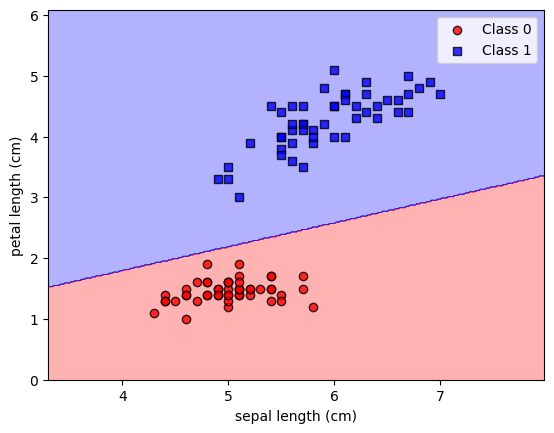

In [105]:
plot_decision_regions(X, y, ppn)
plt.xlabel("sepal length (cm)")
plt.ylabel("petal length (cm)") 
plt.legend()
plt.show()

As we can see in the plot, the perceptron learned a decision boundary that can classify all flower examples in the Iris training subset perfectly.

**`Note on Perceptron convergence:`** Although the perceptron classified the two Iris flower classes perfectly, convergence is one of the biggest problems of the perceptron. Rosenblatt proved mathematically that the perceptron learning rule converges if the two classes can be separated by a linear hyperplane. However, if the classes cannot be separated perfectly by such a linear decision boundary, the weights will never stop updating unless we set a maximum number of epochs. 

## Adaptive linear neurons (Adaline) and the convergence of learning

Adaline was published by Bernard Widrow and his doctoral student Tedd Hoff in 1960 and is an improvement on the MCP neuron and the perceptron. It is also a single-layer neural network but, unlike the perceptron, model weights are updated based on a linear ***activation function*** instead of a unit step function.

In the case of Adaline, this linear activation function is simply the identity function of the net input, so that: $$ \phi(z) = z $$

The identity function is a mathematical function that returns its input unchanged. It is a simple function, but it is very useful in many areas of mathematics, including machine learning.

In machine learning, the identity function is often used as an activation function for neural networks. *An activation function is a function that is applied to the net input (i.e, weighted sum of the inputs to a neural network layer plus the bias), to determine the output of the layer.* The identity function is a good choice for an activation function when the output of a layer is intended to be passed directly to the next layer without any transformation.

The identity function can also be used as a loss function for machine learning models. *A loss function is a function that measures the error between the predicted output of a model and the actual output (i.e, the label).* The identity function is a good choice for a loss function when the error between the predicted and actual output is simply the difference between the two values.

While the linear activation function is used for learning the weights, we still use a threshold function to make the final prediction i.e, the original decision function of the MCP neuron:

$$ \sigma(z) = \begin{cases} 1 & \text{if } z \geq 0 \\ 0 & \text{otherwise} \end{cases} $$

Where, $z$ is the net input and is defined as:

$$ z = w_1x_1 + \dots + w_mx_m + b = \sum_{j=1}^{m}w_jx_j + b = w^Tx + b $$

A comparison of the perceptron and Adaline is shown in the following figure:

<img src="./imgs/perceptron_adaline.png">

The Adaline algorithm compares the true class labels with the linear activation function’s continuous valued output to compute the model error and update the weights. In contrast, the perceptron compares the true class labels to the predicted class labels.

### Minimizing cost function with gradient descent

One of the key concepts in supervised machine learning is the ***objective function*** that is to be optimized by an algorithm during the learning process. 

The *objective function* can be either a loss function or a utility/fitness function. Which one to choose depends entirely on the task and the chosen approach.

A ***loss function*** measures the error of the model on the training data (for example MSE - mean squared error). The goal of training a model with a loss function is to minimize the loss. This means that the model will learn to make predictions that are as close as possible to the true values in the training data.

A ***utility/fitness function*** measures the performance of the model on a specific task (for example precision, recall etc). The goal of training a model with a utility/fitness function is to maximize the utility/fitness. This means that the model will learn to make predictions that are optimal for the specific task, even if they are not the same as the true values in the training data.

For example, if we are training a model to classify images of handwritten digits, we might use a cross-entropy loss function. This would ensure that the model learns to make predictions that are as close as possible to the true labels of the images in the training data.

However, if we are training a model to play a game, such as chess, we might use a utility/fitness function. This function would measure how well the model is playing the game, such as by the number of games it wins.

In the case of ***Adaline***, our objective function is a loss/cost function. We define the cost function as the ***Mean Squared Error (MSE)*** between the calculated outcome and the true class label:

$$ L(\mathbf{w}, b) = \frac{1}{n} \sum_{i=1}^{n} \big(y^{(i)} - \phi(z^{(i)})\big)^2 $$

Where, 
- $n$ is the number of training samples
- $\mathbf{w}$ is the weight vector
- $b$ is the bias unit
- $y^{(i)}$ is the true class label of the $i$ th training sample
- $\phi(z^{(i)})$ is the linear activation function for the $i$ th training sample which in this case happens to be the net input, $z^{(i)}$

*The main advantage of this continuous linear activation function, in contrast to the unit step function (which produced output as an integer class label i.e, either 0 or 1), is that the loss function becomes differentiable. Another nice property of this loss function is that it is convex; thus, we can use a very simple yet powerful optimization algorithm called ***gradient descent*** to find the weights that minimize our loss function.*

We can describe the main idea behind gradient descent as climbing down a hill until a local or global loss minimum is reached (***for simplicity the following figure visualizes this only for a single weight, $w$***):

<img src="./imgs/how_gradient_descent_works.png">

In gradient descent, the gradient refers to the slope of the loss function at a particular point. The gradient is a vector that points in the direction of the steepest ascent of the loss function i.e, the gradient of a loss function tells us the direction in which the function increases the most rapidly. By moving in the opposite direction of the gradient, we are moving towards the minimum of the loss function.

**Note:** Sometimes the term *"gradient"* is used to refer to the loss function itself.

*In each iteration, we take a step in the opposite direction of the gradient, where the step size (i.e, update to the model parameters) is determined by the value of the learning rate, as well as the slope of the gradient* such that:

$$ \mathbf{w} := \mathbf{w} + \Delta \mathbf{w}  = \mathbf{w} + \eta (- \nabla_w L(\mathbf{w}, b)) $$

$$ b := b + \Delta b = b + \eta (- \nabla_b L(\mathbf{w}, b)) $$

Where, 

- $\eta$ is the learning rate
- $\nabla_w L(\mathbf{w}, b)$ is the gradient of the loss function with respect to the model weights
- $\nabla_b L(\mathbf{w}, b)$ is the gradient of the loss function with respect to the bias unit

Now, we compute the gradient by partial differentiation of the cost function with respect to each weight $w_j$ and the bias unit $b$ and finally obtain:

$$ \frac{\partial L}{\partial w_j} = - \frac{2}{n} \sum_{i=1}^{n} \big(y^{(i)} - \phi(z^{(i)})\big)x_j^{(i)} $$

$$ \frac{\partial L}{\partial b} = - \frac{2}{n} \sum_{i=1}^{n} \big(y^{(i)} - \phi(z^{(i)})\big) $$

**Note:** the 2 in the numerator above is merely a constant scaling factor, and we could omit it without affecting the algorithm. Removing the scaling factor has the same effect as changing the learning rate by a factor of 2.

*Finally the update rules for the Adaline weights and bias unit become:*

$$ \mathbf{w_j} := \mathbf{w_j} + \frac{\eta}{n} \sum_{i=1}^{n} \big(y^{(i)} - \phi(z^{(i)})\big)x^{(i)}_j $$

$$ b := b + \frac{\eta}{n} \sum_{i=1}^{n} \big(y^{(i)} - \phi(z^{(i)})\big) $$

Although in its simplest form, the update rule for the Adaline learning rule is identical to the perceptron rule i.e, 

$$\mathbf{w_j} := \mathbf{w_j} + \Delta \mathbf{w_j}$$ 
$$b := b + \Delta b$$ 

In reality they are actually quite different. 

In the case of Adaline, the error in the output is a real number and not an integer class label, since error in the output is calculated as $(y - \phi(z)) \text{ i.e, } (y - z)$ instead of $(y - \hat{y})$. 

Furthermore, the weight update is calculated based on all examples in the training dataset (instead of updating the parameters incrementally after each training example), which is why this approach is also referred to as **batch gradient descent** or, **full batch gradient descent**. 